# Task 2

---

## Building a Predictive Model for Holiday Purchases in the Airline Industry

**Context**

In today's information-rich environment, customers are more informed and empowered than ever. As a result, the buying cycle has drastically changed. Airlines can no longer rely on reactive strategies to capture customer interest at the airport. Instead, they must proactively engage potential customers well before their holiday begins.


**Objective**

To build a high-quality predictive model using customer booking data that enables airlines to identify and engage potential customers early. This involves manipulating and preparing the data, training machine learning algorithms, evaluating the model's performance, and interpreting the results to understand each variable's contribution to predicting holiday purchases.


---
### 1. Import necessary libraries

In [1]:
# For dat manipulation and anlysis
import pandas as pd
import numpy as np

#For Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#For the predictive modeling technique
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

### 2. Load the dataset

In [2]:
# Load your dataset into a pandas DataFrame
data = pd.read_csv("customer_booking.csv", encoding="ISO-8859-1")
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns.

### 3. Explore the dataset

In [3]:
# Shape of the dataset
print(f'There are {data.shape[0]} rows and {data.shape[1]} columns in the datset')

There are 50000 rows and 14 columns in the datset


In [4]:
# Find missing values
data.isna().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
num_passengers,50000.0,NaN,NaN,NaN,1.59124,1.020165,1.0,1.0,1.0,2.0,9.0
sales_channel,50000,2,Internet,44382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
trip_type,50000,3,RoundTrip,49497,NaN,NaN,NaN,NaN,NaN,NaN,NaN
purchase_lead,50000.0,NaN,NaN,NaN,84.94048,90.451378,0.0,21.0,51.0,115.0,867.0
length_of_stay,50000.0,NaN,NaN,NaN,23.04456,33.88767,0.0,5.0,17.0,28.0,778.0
flight_hour,50000.0,NaN,NaN,NaN,9.06634,5.41266,0.0,5.0,9.0,13.0,23.0
flight_day,50000,7,Mon,8102,NaN,NaN,NaN,NaN,NaN,NaN,NaN
route,50000,799,AKLKUL,2680,NaN,NaN,NaN,NaN,NaN,NaN,NaN
booking_origin,50000,104,Australia,17872,NaN,NaN,NaN,NaN,NaN,NaN,NaN
wants_extra_baggage,50000.0,NaN,NaN,NaN,0.66878,0.470657,0.0,0.0,1.0,1.0,1.0


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

**Observations**:
- **purchase_lead**: The average purchase lead time is around 85 days, with a standard deviation of about 90 days. This implies that some booking are made close to the arrival date while others are made quite far in advance. There is a large difference between the 75th percentile (i.e. 115 days) and the maximum value (i.e., 867 days), which indicates potential outliers.
- **num_passengers**: We typically have 1 passenger per booking, with the maximum number of passengers being 9.
- **sales_channel**: The majority of sales are through the Internet (88.76% of transactions).
- **trip_type**: Most trips are RoundTrip, accounting for 98.994% of the trips.
- **length_of_stay**: On average, the length of stay is about 23 days, with a high standard deviation of around 34 days. Most stays are between 5 and 28 days, but there are some significantly longer stays (up to 778 days).
- **flight_hour**: Flights are typically around 9 hours in duration on average.
- **booking_origin**: The most common booking origin is Australia, with 17,872 bookings. There are 104 unique booking origins.
- **wants_extra_baggage**: Approximately 66.88% of bookings include a request for extra baggage.
- **wants_preferred_seat**: About 29.70% of passengers request a preferred seat.
- **wants_in_flight_meals**: Approximately 42.71% of passengers request in-flight meals.
- **flight_duration**: The average flight duration is about 7.28 hours, with most flights lasting between 5.62 and 8.83 hours.
- **booking_complete**: Only about 14.96% of bookings are completed, indicating a high rate of incomplete bookings.

#### Numerical Summary

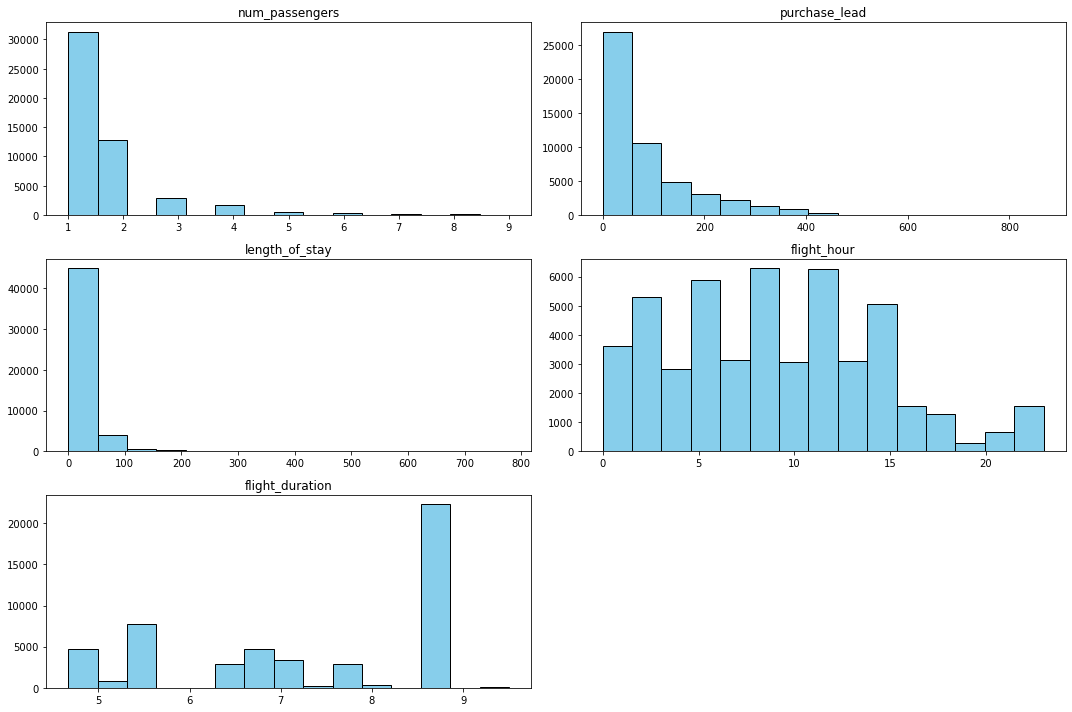

In [7]:
numeric_columns = ['num_passengers','purchase_lead','length_of_stay', 'flight_hour','flight_duration']
_ = data[numeric_columns].hist(grid=False, bins=15, color ='skyblue',edgecolor = 'black', figsize=(15,10))
plt.tight_layout()
plt.show()

**Obsevations**:
- **Early Bookings**: Customers generally book well in advance.
- 
- 
- 
-

---
### Categorical Summary

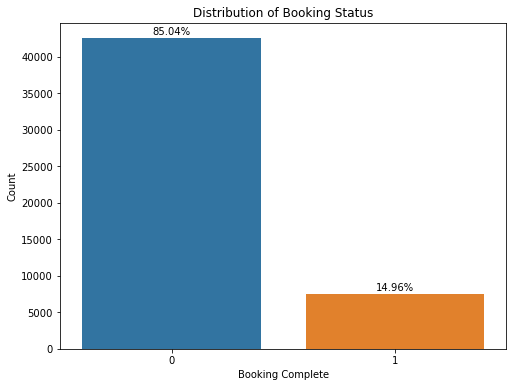

Booking Complete Counts:
booking_complete
0    42522
1     7478
Name: count, dtype: int64


In [8]:
# Booking_complete
# Count the number of occurrences for each booking complete status (Complete (1) and Not Complete (0))
status_counts = data['booking_complete'].value_counts()

# Calculate the percentage of each booking status
status_percentages = (status_counts / len(data)) * 100
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=status_counts.index, y=status_counts.values)
plt.title('Distribution of Booking Status')
plt.xlabel('Booking Complete')
plt.ylabel('Count')

# Annotate the bars with the percentage values
for index, value in enumerate(status_counts.values):
    plt.text(index, value + 500, f'{status_percentages[index]:.2f}%', ha='center', color='black')

plt.show()

# Print counts and percentages
print("Booking Complete Counts:")
print(status_counts)

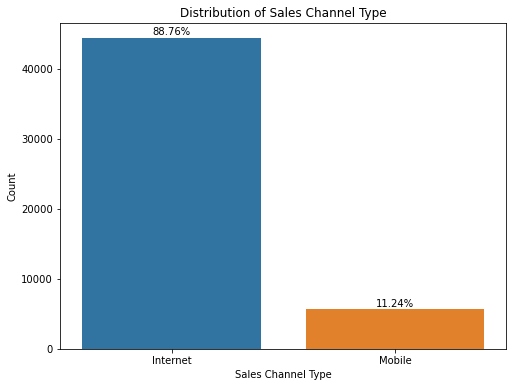

Sales Channel Type Counts:
sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64


In [9]:
# Sales channel

# Count the number of occurrences for each sales_channel (Internet and Mobile)
sales_channel_counts = data['sales_channel'].value_counts()

# Calculate the percentage of each booking status
sales_channel_percentages = (sales_channel_counts / len(data)) * 100
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=sales_channel_counts.index, y=sales_channel_counts.values)
plt.title('Distribution of Sales Channel Type')
plt.xlabel('Sales Channel Type')
plt.ylabel('Count')

# Annotate the bars with the percentage values
for index, value in enumerate(sales_channel_counts.values):
    plt.text(index, value + 500, f'{sales_channel_percentages[index]:.2f}%', ha='center', color='black')

plt.show()

# Print counts and percentages
print("Sales Channel Type Counts:")
print(sales_channel_counts)

- **High Internet Usage**: Sales channels are predominantly through the Internet.

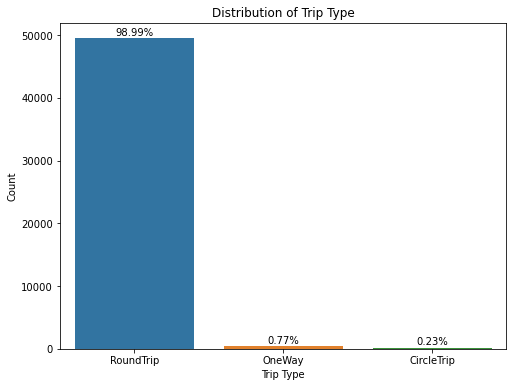

Trip Type Counts:
trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64


In [10]:
# Trip Type

# Count the number of occurrences for each trip_type (Round, One Way and Circle Types)
trip_type_counts = data['trip_type'].value_counts()

# Calculate the percentage of each booking status
trip_type_percentages = (trip_type_counts / len(data)) * 100
# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=trip_type_counts.index, y=trip_type_counts.values)
plt.title('Distribution of Trip Type')
plt.xlabel('Trip Type')
plt.ylabel('Count')

# Annotate the bars with the percentage values
for index, value in enumerate(trip_type_counts.values):
    plt.text(index, value + 500, f'{trip_type_percentages[index]:.2f}%', ha='center', color='black')

plt.show()

# Print counts and percentages
print("Trip Type Counts:")
print(trip_type_counts)

- **RoundTrip Dominance**: RoundTrip is the most common trip type.

In [11]:
data['booking_origin'].value_counts()

booking_origin
Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: count, Length: 104, dtype: int64

- The countries with the highest flight counts (e.g., Australia, Malaysia) indicate the most frequent sources of bookings. These might be major hubs or popular destinations.

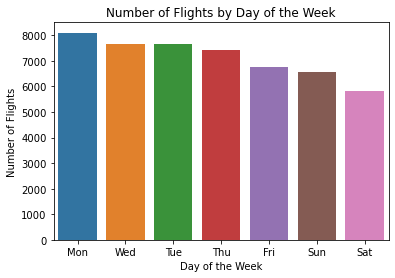

flight_day
Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: count, dtype: int64

In [12]:
import seaborn as sns

# Calculate the counts of each day and sort them in descending order
day_counts = data['flight_day'].value_counts()
sorted_days = day_counts.index 

sns.countplot(data=data, x='flight_day',order=sorted_days)
plt.xlabel('Day of the Week')
plt.ylabel('Number of Flights')
plt.title('Number of Flights by Day of the Week')
plt.show()

day_counts

- Most Popular Days: Monday has the highest number of flights, followed closely by Wednesday and Tuesday.
- Least Popular Day: Saturday has the fewest flights, indicating it is the least preferred day for flights in this dataset.
- Weekend Trends: There is a noticeable drop in the number of flights on Friday, Saturday, and Sunday compared to the midweek days.

---

## 4.Exploratory Data Analysis (EDA)

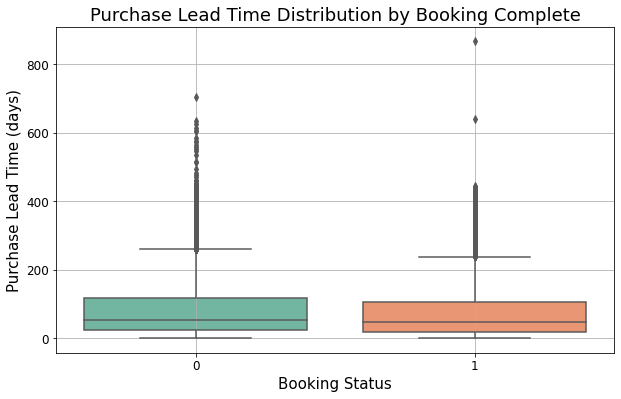

In [13]:
# Visualizing the relationship between purchase lead time and booking complete status
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x="booking_complete", y="purchase_lead", palette="Set2")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Booking Status', fontsize=15)
plt.ylabel('Purchase Lead Time (days)', fontsize=15)
plt.title('Purchase Lead Time Distribution by Booking Complete', fontsize=18)
plt.grid(True)
plt.show()

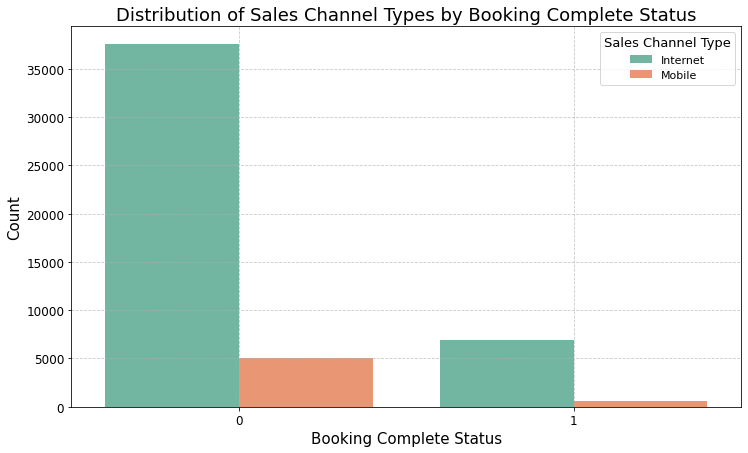

In [14]:
# Visualizing the relationship between Sales channel and booking complete status
plt.figure(figsize=(12, 7))
sns.countplot(data=data, x="booking_complete", hue="sales_channel", palette="Set2")
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('Booking Complete Status', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Distribution of Sales Channel Types by Booking Complete Status', fontsize=18)
plt.legend(title='Sales Channel Type', title_fontsize='13', fontsize='11')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

---

## 5. **Model Building**

### **Data Preprocessing**


In [15]:
# Copy of the data
df = data.copy()

Regarding data preprocessing we do the following
- Encoding the categorical variable using numerical values/ boolean values
- Feature Engineering
---

1. **flight_day** data encoding

In [16]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [17]:
mapping = { "Mon": 1,"Tue": 2,"Wed": 3,"Thu": 4,"Fri": 5, "Sat": 6,"Sun": 7}

df["flight_day"] = df["flight_day"].map(mapping)

In [18]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

2. **sales_channel**

In [19]:
# Convert 'sales_channel' to categorical type
df['sales_channel'] = df['sales_channel'].astype('category')
df['sales_channel'].value_counts()

sales_channel
Internet    44382
Mobile       5618
Name: count, dtype: int64

3. **trip_type**

In [20]:
# Convert 'trip_type' to categorical type
df['trip_type'] = df['trip_type'].astype('category')
df['trip_type'].value_counts()

trip_type
RoundTrip     49497
OneWay          387
CircleTrip      116
Name: count, dtype: int64

In [21]:
# One-hot encode
df = pd.get_dummies(df, columns=['sales_channel','trip_type'], prefix=['channel','trip'])

4. **booking_origin**

In [22]:
# Convert 'booking_origin' to categorical type
df['booking_origin'] = df['booking_origin'].astype('category')

# Overview
df['booking_origin'].value_counts()

booking_origin
Australia         17872
Malaysia           7174
South Korea        4559
Japan              3885
China              3387
                  ...  
Seychelles            1
Norfolk Island        1
Pakistan              1
Panama                1
Nicaragua             1
Name: count, Length: 104, dtype: int64

In [23]:
df

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,channel_Internet,channel_Mobile,trip_CircleTrip,trip_OneWay,trip_RoundTrip
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,True,False,False,False,True
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,True,False,False,False,True
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,True,False,False,False,True
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,True,False,False,False,True
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,27,6,9,6,PERPNH,Australia,1,0,1,5.62,0,True,False,False,False,True
49996,1,111,6,4,7,PERPNH,Australia,0,0,0,5.62,0,True,False,False,False,True
49997,1,24,6,22,6,PERPNH,Australia,0,0,1,5.62,0,True,False,False,False,True
49998,1,15,6,11,1,PERPNH,Australia,1,0,1,5.62,0,True,False,False,False,True


### Model Selection and Training

#### Splitting the Dataset

Divide the dataset into training, and test sets. A common split is 70-30 or 80-20.
\
The training set is used to train the model, and the test set is used to evaluate the final model's performance.

In this project, we're using the `train_test_split` function from the sklearn.model_selection module to perform the dataset splitting. You can adjust the test_size parameter to control the size of the test set. The random_state parameter is set to ensure reproducibility of the splits.

In [24]:
# Separate the input and output variables
X = df.drop(["booking_complete"], axis=1)
y = df["booking_complete"]

In [25]:
# encoding the categorical variables
X = pd.get_dummies(X, drop_first=True)

In [49]:
X.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,channel_Internet,channel_Mobile,trip_CircleTrip,trip_OneWay,trip_RoundTrip,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLMRU,route_AKLPEK,route_AKLPVG,route_AKLTPE,route_AORICN,route_AORKIX,route_AORKTM,route_AORMEL,route_AORPER,route_AORPUS,route_BBIMEL,route_BBIOOL,route_BBIPER,route_BBISYD,route_BDOCTS,route_BDOCTU,route_BDOHGH,route_BDOICN,route_BDOIKA,route_BDOKIX,route_BDOMEL,route_BDOOOL,route_BDOPEK,route_BDOPER,route_BDOPUS,route_BDOPVG,route_BDOSYD,route_BDOTPE,route_BDOWUH,route_BDOXIY,route_BKICKG,route_BKICTS,route_BKICTU,route_BKIDEL,route_BKIHND,route_BKIICN,route_BKIKIX,route_BKIKTM,route_BKIMEL,route_BKIMRU,route_BKIOOL,route_BKIPEK,route_BKIPER,route_BKIPUS,route_BKIPVG,route_BKISYD,route_BKIXIY,route_BLRICN,route_BLRMEL,route_BLRPER,route_BLRSYD,route_BOMMEL,route_BOMOOL,route_BOMPER,route_BOMSYD,route_BTJJED,route_BTUCKG,route_BTUICN,route_BTUPER,route_BTUSYD,route_BTUWUH,route_BWNCKG,route_BWNDEL,route_BWNHGH,route_BWNIKA,route_BWNKTM,route_BWNMEL,route_BWNOOL,route_BWNPER,route_BWNSYD,route_BWNTPE,route_BWNWUH,route_CANDEL,route_CANIKA,route_CANMEL,route_CANMRU,route_CANOOL,route_CANPER,route_CANSYD,route_CCUMEL,route_CCUMRU,route_CCUOOL,route_CCUPER,route_CCUSYD,route_CCUTPE,route_CEBMEL,route_CEBOOL,route_CEBPER,route_CEBSYD,route_CGKCKG,route_CGKCTS,route_CGKCTU,route_CGKDEL,route_CGKHGH,route_CGKHND,route_CGKICN,route_CGKIKA,route_CGKJED,route_CGKKIX,route_CGKKTM,route_CGKMEL,route_CGKMRU,route_CGKOOL,route_CGKPEK,route_CGKPER,route_CGKPUS,route_CGKPVG,route_CGKSYD,route_CGKTPE,route_CGKWUH,route_CGKXIY,route_CKGCOK,route_CKGDPS,route_CKGHKT,route_CKGJHB,route_CKGKCH,route_CKGKNO,route_CKGLGK,route_CKGLOP,route_CKGMAA,route_CKGMEL,route_CKGMRU,route_CKGMYY,route_CKGOOL,route_CKGPEN,route_CKGPER,route_CKGPNH,route_CKGSBW,route_CKGSGN,route_CKGSIN,route_CKGSUB,route_CKGSYD,route_CKGTGG,route_CKGTRZ,route_CKGTWU,route_CMBCTS,route_CMBCTU,route_CMBHGH,route_CMBHND,route_CMBICN,route_CMBKIX,route_CMBMEL,route_CMBMRU,route_CMBOOL,route_CMBPEK,route_CMBPER,route_CMBPVG,route_CMBSYD,route_CMBWUH,route_CNXDEL,route_CNXHND,route_CNXICN,route_CNXKIX,route_CNXMEL,route_CNXOOL,route_CNXPEK,route_CNXPER,route_CNXPUS,route_CNXPVG,route_CNXSYD,route_CNXTPE,route_CNXXIY,route_COKCTS,route_COKCTU,route_COKHGH,route_COKICN,route_COKKIX,route_COKMEL,route_COKOOL,route_COKPER,route_COKPUS,route_COKSYD,route_COKTPE,route_COKWUH,route_CRKMEL,route_CRKOOL,route_CRKSYD,route_CSXMRU,route_CSXPER,route_CSXSYD,route_CTSDMK,route_CTSDPS,route_CTSHKT,route_CTSJHB,route_CTSJOG,route_CTSKBR,route_CTSKCH,route_CTSKNO,route_CTSLGK,route_CTSMEL,route_CTSMYY,route_CTSOOL,route_CTSPEN,route_CTSPER,route_CTSSBW,route_CTSSGN,route_CTSSIN,route_CTSSUB,route_CTSSYD,route_CTUDMK,route_CTUDPS,route_CTUHKT,route_CTUIKA,route_CTUJHB,route_CTUKBR,route_CTUKBV,route_CTUKCH,route_CTUKNO,route_CTULGK,route_CTULOP,route_CTUMAA,route_CTUMEL,route_CTUMLE,route_CTUMRU,route_CTUMYY,route_CTUOOL,route_CTUPEN,route_CTUPER,route_CTUREP,route_CTUSBW,route_CTUSGN,route_CTUSIN,route_CTUSRG,route_CTUSUB,route_CTUSYD,route_CTUTGG,route_CTUTRZ,route_CTUTWU,route_CTUURT,route_CXRMEL,route_DACHGH,route_DACHND,route_DACICN,route_DACKIX,route_DACMEL,route_DACMRU,route_DACOOL,route_DACPEK,route_DACPER,route_DACPUS,route_DACSYD,route_DACTPE,route_DADMEL,route_DADOOL,route_DADSYD,route_DELDMK,route_DELDPS,route_DELHKG,route_DELHKT,route_DELHND,route_DELJHB,route_DELJOG,route_DELKBR,route_DELKBV,route_DELKCH,route_DELKIX,route_DELKNO,route_DELLGK,route_DELMEL,route_DELMFM,route_DELMNL,route_DELMRU,route_DELMYY,route_DELOOL,route_DELPEN,route_DELPER,route_DELPNH,route_DELREP,route_DELRGN,route_DELSBW,route_DELSGN,route_DELSIN,route_DELSUB,route_DELSYD,route_DELSZX,route_DELURT,route_DMKHGH,route_DMKHND,route_DMKICN,route_DMKIKA,route_DMKKIX,route_DMKKTM,route_DMKMEL,route_DMKMRU,route_DM

In [27]:
# Split the data into training, validation, and test sets
from sklearn.model_selection import train_test_split

# splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


#### Train the Random Forest Model

In [28]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# evaluating the model performance on the train data
from sklearn.metrics import f1_score,confusion_matrix,classification_report,ConfusionMatrixDisplay

model_train_predictions = rf_model.predict(X_train)
model_train_score = f1_score(y_train, model_train_predictions)

print("Model Score on Train Data:", np.round(100*model_train_score, 2))

Model Score on Train Data: 99.96


In [30]:
# evaluating the model performance on the test data
model_test_predictions = rf_model.predict(X_test)
model_test_score = f1_score(y_test, model_test_predictions)

print("Model Score on Test Data:", np.round(100*model_test_score, 2))

Model Score on Test Data: 22.02


In [43]:
# Test the model on the test data
test_accuracy = accuracy_score(y_test, model_test_predictions)
print(f"Test Accuracy: {test_accuracy:.2f}")

Test Accuracy: 0.85


In [31]:
class_report = classification_report(y_train,model_train_predictions)
print(class_report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29738
           1       1.00      1.00      1.00      5262

    accuracy                           1.00     35000
   macro avg       1.00      1.00      1.00     35000
weighted avg       1.00      1.00      1.00     35000



In [32]:
class_report_test = classification_report(y_test,model_test_predictions)
print(class_report_test)

              precision    recall  f1-score   support

           0       0.87      0.97      0.92     12784
           1       0.49      0.14      0.22      2216

    accuracy                           0.85     15000
   macro avg       0.68      0.56      0.57     15000
weighted avg       0.81      0.85      0.81     15000



**Observation**
- There is a notable **class imbalance**, with class 0 (Not Complete) having significantly more instances than class 1 (Complete).
- The model performs very well on class 0 but poorly on class 1, as seen in the low precision, recall, and F1 score for class 1.
- The high accuracy suggests that the model performs well overall, but this might be misleading due to the class imbalance.
- The low performance metrics for class 1 indicate that the model struggles to correctly identify this class.

In [44]:
con_mat = confusion_matrix(y_test,model_test_predictions)

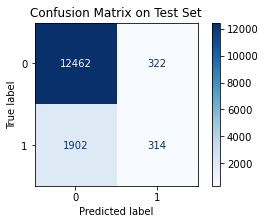

In [34]:
# Create ConfusionMatrixDisplay object
disp = ConfusionMatrixDisplay(confusion_matrix=con_mat, display_labels=rf_model.classes_)
fig, ax = plt.subplots(figsize=(5, 3))
# Plot the confusion matrix
disp.plot(cmap=plt.cm.Blues, ax=ax)
plt.title('Confusion Matrix on Test Set')
plt.show()

#### **Understand the model prediction**

1. True Positive (**TP**): The model correctly predicted that the booking was complete (1) and it was indeed complete. In our case, TP = 314.
2. False Positive (**FP**): The model predicted that the booking was complete (1) but it was actually not complete. FP = 322.
3. True Negative (**TN**): The model correctly predicted that the booking was not complete (0) and it was indeed not complete. In our case, TN = 12462.
4. False Negative (**FN**): The model predicted that the booking was not complete (0) but it was actually complete. FN = 1902.

- The model performs very well in predicting bookings that are not complete.
- Given the **Low Precision** and **Low Recall** with an **F1 Score** of 0.22, the model struggles significantly in predicting whether a booking is complete, leading to poor performance for this class.

---

Besides precision, recall, and F1-score, we will use additional metrics such as ROC-AUC or precision-recall curves to better understand and improve the model's performance, especially for the minority class.


In [35]:
from sklearn.metrics import roc_auc_score,roc_curve,precision_recall_curve,average_precision_score

# Predict probabilities
y_probs = rf_model.predict_proba(X_test)[:, 1]

# Calculate ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

In [36]:
# Calculate Precision-Recall curve and Average Precision
precision, recall, _ = precision_recall_curve(y_test, y_probs)
average_precision = average_precision_score(y_test, y_probs)

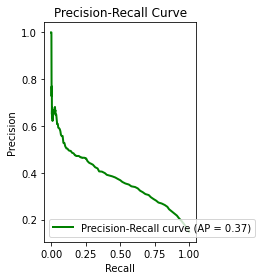

In [37]:
# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()

The Average Precision (AP) score of 0.37 reflects the model's performance, particularly for the positive class (in this case, "booking complete"). Such score suggest that, on average, the precision for different recall levels is relatively low. This indicates that the model struggles to maintain high precision across various recall thresholds. 

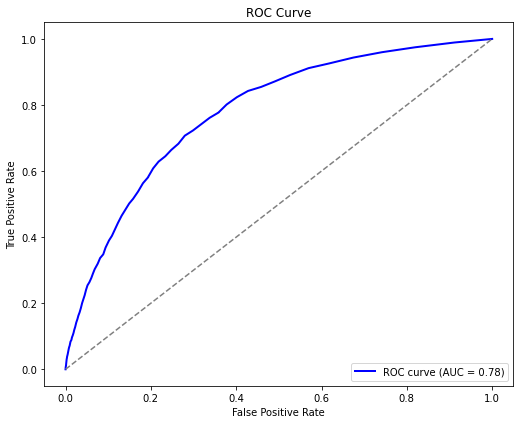

In [38]:
# Plot ROC Curve
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

An **AUC** of 0.78 is generally considered to reflect a good level of model performance. The model does well in distinguishing between the positive and negative classes, but it is not perfect.

### Interpretation of Results: Feature Importance
**Feature Importances** is used to determine the contribution of individual input features (variables) in making predictions.

#### Access Feature Importance: 
Random Forest models provide a feature importance score for each input feature. You can access these scores using the `feature_importances_` attribute of the trained model.

In [39]:
# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to show feature importances
importance_df = pd.DataFrame({"Feature": X.columns, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

In [40]:
importance_df.head(20)

,Feature,Importance
1,purchase_lead,0.152599
3,flight_hour,0.125413
2,length_of_stay,0.114771
4,flight_day,0.089110
0,num_passengers,0.047268
8,flight_duration,0.035214
862,booking_origin_Malaysia,0.030898
7,wants_in_flight_meals,0.023107
815,booking_origin_Australia,0.020361
6,wants_preferred_seat,0.018087


In [41]:
# Select the top 10 features
top_10_features = importance_df.head(10)

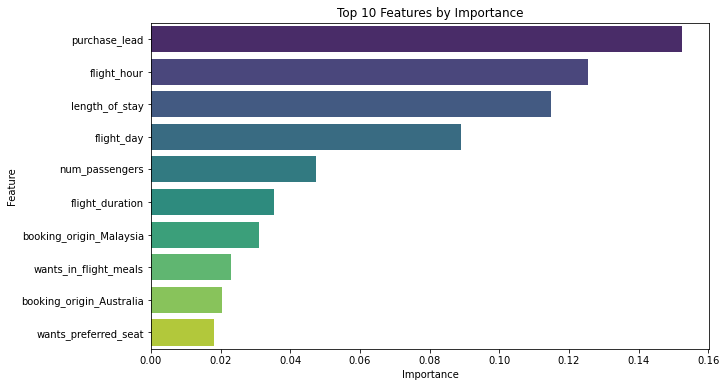

In [42]:
# Visualization
# Plot feature importances using a bar chat
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=top_10_features, palette="viridis")
plt.title('Top 10 Features by Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

We see that the features 'purchace_lead', 'flight_hour' and 'length_of_stay' are with higher scores and are considered more important in making predictions.

## Can we do better?

### What to do next:

#### **Feature Engineering/ Feature Selection**

Add, remove or refine features that might better capture the characteristics of the positive class.

#### **Model Tuning**

We can consider exploring different algorithms or tuning hyperparameters to improve the model’s performance on the minority class.
